With this notebook you can reproduce the results from the paper **X-ray irradiation and evaporation of the four young planets around V1298 Tau**

# Import

In [3]:
import sys
sys.path.append('../platypos_package/')

# Planet Class
from Planet_class_LoFo14_PAPER import planet_LoFo14_PAPER # this is the code with fixed step size
from Planet_class_LoFo14 import planet_LoFo14 # this is the code with variable step size
from Planet_class_Ot20_PAPER import planet_Ot20_PAPER # this is the code with fixed step size
from Planet_class_Ot20 import planet_Ot20  # this is the code with variable step size
import Planet_models_LoFo14 as plmo14
import Planet_model_Ot20 as plmoOt20
from Lx_evo_and_flux import Lx_evo, flux_at_planet_earth

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize': 14})
mpl.rcParams['axes.linewidth'] = 1.1 #set the value globally
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.ticker as ticker
import os
from astropy import constants as const
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from PyAstronomy import pyasl

p = "../supplementary_files/"
# Tu et al. (2015) - model tracks
blueTu15 = pd.read_csv(p+'Lx_blue_track.csv')
redTu15 = pd.read_csv(p+'Lx_red_track.csv')
greenTu15 = pd.read_csv(p+'Lx_green_track.csv')
                    
# Jackson et al. (2012) - Lx sample

def read_results_file(path, filename):
    # read in results files
    df = pd.read_csv(path+filename)
    t, M, R, Lx = df["Time"].values, df["Mass"].values, df["Radius"].values, df["Lx"].values
    return t, M, R, Lx

## V1298 Tau parameters, evolutionary tracks & create LoFo14 & Ot20 planet instances

First we need to define all the necessary system parameters. <br>
This includes the host star, the parameters of the evolutionary tracks, and the planets themselves.

In [27]:
L_sun = const.L_sun
L_bol = 0.934 # David et al. 2019
mass_star = 1.101
radius_star = 1.345
age_star = 23. # Myr
Lx_age = Lx_chandra = 1.3e30
Lx_age_error = 1.4e29

# use dictionary to store star-parameters
star_V1298Tau = {'star_id': 'V1298Tau', 'mass': mass_star, 'radius': radius_star, 'age': age_star, 'L_bol': L_bol, 'Lx_age': Lx_age}
age = star_V1298Tau["age"]
# create dictionaries with all the values necessary to create the evolutionary paths
Lx_1Gyr = 2.10*10**28  # Lx value at 1 Gyr from Tu et al. (2015) model tracks
Lx_5Gyr = 1.65*10**27  # Lx value at 5 Gyr from Tu et al. (2015) model tracks

track1 = {"t_start": age, "t_sat": 240., "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}
track2 = {"t_start": age, "t_sat": age, "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}
track2_2 = {"t_start": age, "t_sat": 70., "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 20., "Lx_drop_factor": 5.}
track2_3 = {"t_start": age, "t_sat": 100., "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}
track3 = {"t_start": age, "t_sat": age, "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 20., "Lx_drop_factor": 16.}



## Plot current V1298 Tau Lx & evolutionary tracks

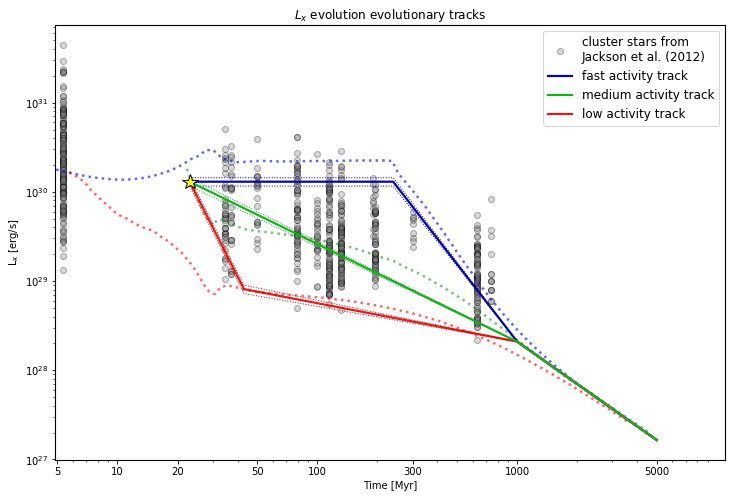

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('$L_x$ evolution evolutionary tracks')

ax.plot(blue[0], blue[1], marker="None", linestyle=":", color="blue", linewidth=2.5, alpha=0.6, label='_nolegend_')#, label="fast rot. (solar model)")
ax.plot(red[0], red[1], marker="None", linestyle=":", color="red", linewidth=2.5, alpha=0.6, label='_nolegend_')#, label="slow rot. (solar model)")
ax.plot(green[0], green[1], marker="None", linestyle=":", color="green", linewidth=2.5, alpha=0.5, label='_nolegend_')#, label="interm. rot. (solar model)")
ax.plot(jack["age"]/1e6, 10**jack["logLx_cgs"], ls="None", marker="o", color="grey", mec="k", alpha=0.3, zorder=1, label="cluster stars from \nJackson et al. (2012)")

#####################################################################
step_size = 1.
t_track_start = age
t_track_end = 5000.
t_arr = np.arange(t_track_start, t_track_end+step_size, step_size)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track1) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:royal blue", ls="-", zorder=2, label="fast activity track", lw=2.2)
# 1 sigma errorbars on Lx at 23 Myr
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track1_lower) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:royal blue", ls=":", zorder=2, label="__nolabel__", lw=1)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track1_upper) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:royal blue", ls=":", zorder=2, label="__nolabel__", lw=1)

#####
t_arr = np.arange(t_track_start, t_track_end+step_size, step_size)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track2) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:green", zorder=3, lw=2.2, alpha=1., label="medium activity track")
# 1 sigma errorbars on Lx at 23 Myr
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track2_lower) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:green", ls=":", zorder=2, label="__nolabel__", lw=1)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track2_upper) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:green", ls=":", zorder=2, label="__nolabel__", lw=1)
#####
# t_arr = np.arange(t_track_start, t_track_end+step_size, step_size)
# Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track2_2) for t_i in t_arr])
# ax.plot(t_arr, Lx_arr, color="green", zorder=3, lw=2.2, alpha=1., label="medium activity track 2")
# #####
# t_arr = np.arange(t_track_start, t_track_end+step_size, step_size)
# Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track2_3) for t_i in t_arr])
# ax.plot(t_arr, Lx_arr, color="xkcd:orange", zorder=1, lw=2.2, alpha=1., label="100 Myr saturation")
#####
t_arr = np.arange(t_track_start, t_track_end+step_size, step_size)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track3) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:red", zorder=2, label="low activity track", alpha=0.9, ls="-", lw=2.2)
# 1 sigma errorbars on Lx at 23 Myr
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track3_lower) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:red", ls=":", zorder=2, label="__nolabel__", lw=1)
Lx_arr = np.array([Lx_evo(t=t_i, track_dict=track3_upper) for t_i in t_arr])
ax.plot(t_arr, Lx_arr, color="xkcd:red", ls=":", zorder=2, label="__nolabel__", lw=1)
#####################################################################

ax.plot(age, Lx_age, marker="*", ms=16, color="yellow", mec="black", zorder=10)


ax.loglog()
ax.set_xlabel("Time [Myr]")
ax.set_ylabel("L$_\mathrm{x}$ [erg/s]")
ax.set_xticks([5, 10, 20, 50, 100, 300, 1000, 5000])
ax.set_yticks([10**27., 10**28., 10**29., 10**30., 10**31.])
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax.set_xlim(left=4.9, right=11000)
ylim = ax.get_ylim()
ax.set_ylim(abs(ylim[0]), ylim[1])
ax.legend(loc="best", fontsize=12)
#plt.savefig("./tracks_v1298Tau.png", dpi=300)
plt.show()

# Evolve planets (code with variable step size)

## Lower Lx

### Evolve Ot19 planets with lower Lx

### Evolve LoFo14 planets w. 5 Mcore  with upper Lx

# Read in results for Lx

## LoFo14 - Mcore10

In [82]:
%%time
try:
    p = os.getcwd()+"/LoFo14_Results_new/10_Mcore/"
    os.mkdir(p)
    curr_path = p
    print(curr_path)
except:
    try:
        os.mkdir(os.getcwd()+"/LoFo14_Results_new/")
        os.mkdir(os.getcwd()+"/LoFo14_Results_new/10_Mcore/")
        curr_path = os.getcwd()+"/LoFo14_Results_new/10_Mcore/"
        print(curr_path)
    except:  
        print("Path exists")
        curr_path = os.getcwd()+"/LoFo14_Results_new/10_Mcore/"
        print(curr_path)
    
folders = ["planet_c", "planet_d", "planet_b", "planet_e"]
for f in folders:
    if os.path.isdir(curr_path+f) == True:
        pass
    else:
        os.mkdir(curr_path+f)

# planet c
folder = folders[0]
pl_c_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_c_10, M1_c_10, R1_c_10, Lx1_c_10 = pl_c_10.read_results(curr_path+folder+"/")
pl_c_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_c_10, M2_c_10, R2_c_10, Lx2_c_10 = pl_c_10.read_results(curr_path+folder+"/")
pl_c_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_c_10, M3_c_10, R3_c_10, Lx3_c_10 = pl_c_10.read_results(curr_path+folder+"/")

# planet d
folder = folders[1]
pl_d_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_d_10, M1_d_10, R1_d_10, Lx1_d_10 = pl_d_10.read_results(curr_path+folder+"/")
pl_d_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_d_10, M2_d_10, R2_d_10, Lx2_d_10 = pl_d_10.read_results(curr_path+folder+"/")
pl_d_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_d_10, M3_d_10, R3_d_10, Lx3_d_10 = pl_d_10.read_results(curr_path+folder+"/")

# planet b
folder = folders[2]
pl_b_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_b_10, M1_b_10, R1_b_10, Lx1_b_10_2 = pl_b_10.read_results(curr_path+folder+"/")
pl_b_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_b_10, M2_b_10, R2_b_10, Lx2_b_10_2 = pl_b_10.read_results(curr_path+folder+"/")
pl_b_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_b_10, M3_b_10, R3_b_10, Lx3_b_10_2 = pl_b_10.read_results(curr_path+folder+"/")

# planet e
folder = folders[3]
pl_e_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_e_10, M1_e_10, R1_e_10, Lx1_e_10_2 = pl_e_10.read_results(curr_path+folder+"/")
pl_e_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_e_10, M2_e_10, R2_e_10, Lx2_e_10_2 = pl_e_10.read_results(curr_path+folder+"/")
pl_e_10.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_e_10, M3_e_10, R3_e_10, Lx3_e_10_2 = pl_e_10.read_results(curr_path+folder+"/")

Path exists
/media/laura/SSD2lin/PhD/work/gitlab/plaml/example_V1298Tau/LoFo14_Results_new/10_Mcore/
CPU times: user 46.1 ms, sys: 0 ns, total: 46.1 ms
Wall time: 45.1 ms


In [72]:
%%time
try:
    p = os.getcwd()+"/LoFo14_Results_new/5_Mcore/"
    os.mkdir(p)
    curr_path = p
    print(curr_path)
except:
    try:
        os.mkdir(os.getcwd()+"/LoFo14_Results_new/")
        os.mkdir(os.getcwd()+"/LoFo14_Results_new/5_Mcore/")
        curr_path = os.getcwd()+"/LoFo14_Results_new/5_Mcore/"
        print(curr_path)
    except:  
        print("Path exists")
        curr_path = os.getcwd()+"/LoFo14_Results_new/5_Mcore/"
        print(curr_path)
    
folders = ["planet_c", "planet_d", "planet_b", "planet_e"]
for f in folders:
    if os.path.isdir(curr_path+f) == True:
        pass
    else:
        os.mkdir(curr_path+f)

# planet c
folder = folders[0]
pl_c_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_c_5, M1_c_5, R1_c_5, Lx1_c_5 = pl_c_5.read_results(curr_path+folder+"/")
pl_c_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_c_5, M2_c_5, R2_c_5, Lx2_c_5 = pl_c_5.read_results(curr_path+folder+"/")
pl_c_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_c_5, M3_c_5, R3_c_5, Lx3_c_5 = pl_c_5.read_results(curr_path+folder+"/")

# planet d
folder = folders[1]
pl_d_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_d_5, M1_d_5, R1_d_5, Lx1_d_5 = pl_d_5.read_results(curr_path+folder+"/")
pl_d_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_d_5, M2_d_5, R2_d_5, Lx2_d_5 = pl_d_5.read_results(curr_path+folder+"/")
pl_d_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_d_5, M3_d_5, R3_d_5, Lx3_d_5 = pl_d_5.read_results(curr_path+folder+"/")

# planet b
folder = folders[2]
pl_b_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_b_5, M1_b_5, R1_b_5, Lx1_b_5_2 = pl_b_5.read_results(curr_path+folder+"/")
pl_b_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_b_5, M2_b_5, R2_b_5, Lx2_b_5_2 = pl_b_5.read_results(curr_path+folder+"/")
pl_b_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_b_5, M3_b_5, R3_b_5, Lx3_b_5_2 = pl_b_5.read_results(curr_path+folder+"/")

# planet e
folder = folders[3]
pl_e_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_e_5, M1_e_5, R1_e_5, Lx1_e_5_2 = pl_e_5.read_results(curr_path+folder+"/")
pl_e_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_e_5, M2_e_5, R2_e_5, Lx2_e_5_2 = pl_e_5.read_results(curr_path+folder+"/")
pl_e_5.evolve_forward(5000., 0.1, 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_e_5, M3_e_5, R3_e_5, Lx3_e_5_2 = pl_e_5.read_results(curr_path+folder+"/")

Path exists
/media/laura/SSD2lin/PhD/work/gitlab/plaml/example_V1298Tau/LoFo14_Results_new/5_Mcore/
CPU times: user 80.2 ms, sys: 8 ms, total: 88.2 ms
Wall time: 88.5 ms


In [71]:
%%time
try:
    p = os.getcwd()+"/Otegi_results_new/"
    os.mkdir(p)
    curr_path = p
    print(curr_path)
except:
    print("Path exists")
    curr_path = os.getcwd()+"/Otegi_results_new/"
    print(curr_path)

folders = ["planet_c", "planet_d", "planet_b", "planet_e"]
for f in folders:
    if os.path.isdir(curr_path+f) == True:
        pass
    else:
        os.mkdir(curr_path+f)

# planet c
folder = folders[0]
pl_c_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_c_Ot, M1_c_Ot, R1_c_Ot, Lx1_c_Ot = pl_c_Ot.read_results(curr_path+folder+"/")
pl_c_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_c_Ot, M2_c_Ot, R2_c_Ot, Lx2_c_Ot = pl_c_Ot.read_results(curr_path+folder+"/")
pl_c_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_c_Ot, M3_c_Ot, R3_c_Ot, Lx3_c_Ot = pl_c_Ot.read_results(curr_path+folder+"/")

# planet d
folder = folders[1]
pl_d_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_d_Ot, M1_d_Ot, R1_d_Ot, Lx1_d_Ot = pl_d_Ot.read_results(curr_path+folder+"/")
pl_d_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_d_Ot, M2_d_Ot, R2_d_Ot, Lx2_d_Ot = pl_d_Ot.read_results(curr_path+folder+"/")
pl_d_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_d_Ot, M3_d_Ot, R3_d_Ot, Lx3_d_Ot = pl_d_Ot.read_results(curr_path+folder+"/")

# planet b
folder = folders[2]
pl_b_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_b_Ot, M1_b_Ot, R1_b_Ot, Lx1_b_Ot = pl_b_Ot.read_results(curr_path+folder+"/")
pl_b_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_b_Ot, M2_b_Ot, R2_b_Ot, Lx2_b_Ot = pl_b_Ot.read_results(curr_path+folder+"/")
pl_b_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_b_Ot, M3_b_Ot, R3_b_Ot, Lx3_b_Ot = pl_b_Ot.read_results(curr_path+folder+"/")

# planet e
folder = folders[3]
pl_e_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track1, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t1_e_Ot, M1_e_Ot, R1_e_Ot, Lx1_e_Ot = pl_e_Ot.read_results(curr_path+folder+"/")
pl_e_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track2, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t2_e_Ot, M2_e_Ot, R2_e_Ot, Lx2_e_Ot = pl_e_Ot.read_results(curr_path+folder+"/")
pl_e_Ot.evolve_forward(5000., 1., 0.1, K_on="yes", beta_on="yes", evo_track_dict=track3, path_for_saving=curr_path+folder+"/", planet_folder_id=folder)
t3_e_Ot, M3_e_Ot, R3_e_Ot, Lx3_e_Ot = pl_e_Ot.read_results(curr_path+folder+"/")

Path exists
/media/laura/SSD2lin/PhD/work/gitlab/plaml/example_V1298Tau/Otegi_results_new/
CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 31 ms


## Evolution of planets in the Radius-Period diagram

In [85]:
# Instantiate exoplanetEU2 object (download all the planets)
v = pyasl.ExoplanetEU2()
# Export all data as a pandas DataFrame
planets = v.getAllDataPandas()
planets_masses = planets[~np.isnan(planets["mass"])]

mask_nan = ~(np.isnan(planets["orbital_period"]) | np.isnan(planets["radius"]))
mask_P = planets["orbital_period"]<300
planets_ = planets[mask_nan & mask_P] # dataframe only with planets which have P & R

R_to_earth = 11.2
period = planets_["orbital_period"].values
radius = planets_["radius"].values*R_to_earth
ds = planets_["semi_major_axis"].values

# actual data -> transform to log space
log3P = np.log(period)/np.log(3)
log2R = np.log(radius)/np.log(2)

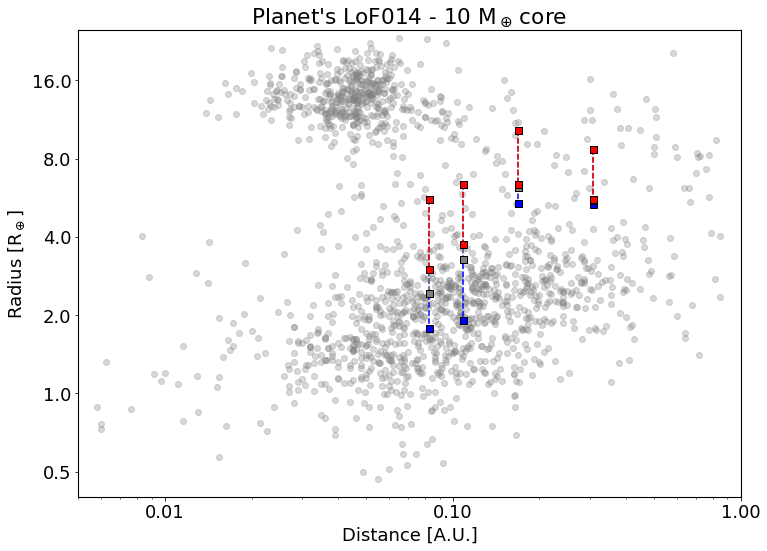

In [90]:
fig, ax = plt.subplots(figsize=(11, 8))

ax.set_title("Planet's LoF014 - 10 M$_\oplus\,$core")
ax.plot(ds, 2**log2R, marker="o", color="grey", alpha=0.3, ls="None")

ax.plot([pl_c_10.distance, pl_c_10.distance], [R1_c_10[0], R1_c_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R2_c_10[0], R2_c_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R3_c_10[0], R3_c_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

# ax.plot([pl_c_10.distance, pl_c_10.distance], [R1_c_10_2[0], R1_c_10_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
# ax.plot([pl_c_10.distance, pl_c_10.distance], [R2_c_10_2[0], R2_c_10_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
# ax.plot([pl_c_10.distance, pl_c_10.distance], [R3_c_10_2[0], R3_c_10_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_d_10.distance, pl_d_10.distance], [R1_d_10[0], R1_d_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R2_d_10[0], R2_d_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R3_d_10[0], R3_d_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

# ax.plot([pl_d_10.distance, pl_d_10.distance], [R1_d_10_2[0], R1_d_10_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
# ax.plot([pl_d_10.distance, pl_d_10.distance], [R2_d_10_2[0], R2_d_10_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
# ax.plot([pl_d_10.distance, pl_d_10.distance], [R3_d_10_2[0], R3_d_10_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_b_10.distance, pl_b_10.distance], [R1_b_10[0], R1_b_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_b_10.distance, pl_b_10.distance], [R2_b_10[0], R2_b_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_b_10.distance, pl_b_10.distance], [R3_b_10[0], R3_b_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.plot([pl_e_10.distance, pl_e_10.distance], [R1_e_10[0], R1_e_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_e_10.distance, pl_e_10.distance], [R2_e_10[0], R2_e_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_e_10.distance, pl_e_10.distance], [R3_e_10[0], R3_e_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_ylabel("Radius [R$_\oplus$]")
ax.set_xlabel("Distance [A.U.]")
ax.loglog(basey=2, basex=10)
ax.set_ylim(0.4, 25)
ax.set_xlim(0.005, 1.0)

import matplotlib.ticker
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
plt.show()

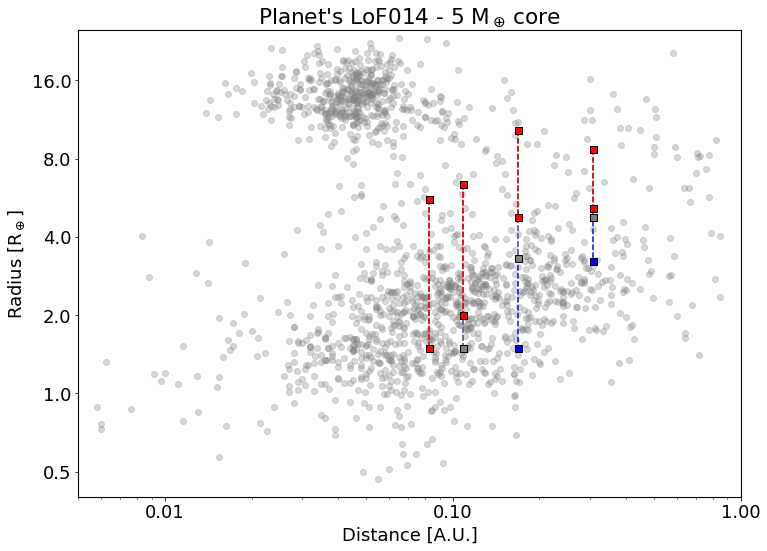

In [91]:
fig, ax = plt.subplots(figsize=(11, 8))

ax.set_title("Planet's LoF014 - 5 M$_\oplus\,$core")
ax.plot(ds, 2**log2R, marker="o", color="grey", alpha=0.3, ls="None")

ax.plot([pl_c_5.distance, pl_c_5.distance], [R1_c_5[0], R1_c_5[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_c_5.distance, pl_c_5.distance], [R2_c_5[0], R2_c_5[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_c_5.distance, pl_c_5.distance], [R3_c_5[0], R3_c_5[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

# ax.plot([pl_c_5.distance, pl_c_5.distance], [R1_c_5_2[0], R1_c_5_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
# ax.plot([pl_c_5.distance, pl_c_5.distance], [R2_c_5_2[0], R2_c_5_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
# ax.plot([pl_c_5.distance, pl_c_5.distance], [R3_c_5_2[0], R3_c_5_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_d_5.distance, pl_d_5.distance], [R1_d_5[0], R1_d_5[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_d_5.distance, pl_d_5.distance], [R2_d_5[0], R2_d_5[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_d_5.distance, pl_d_5.distance], [R3_d_5[0], R3_d_5[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

# ax.plot([pl_d_5.distance, pl_d_5.distance], [R1_d_5_2[0], R1_d_5_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
# ax.plot([pl_d_5.distance, pl_d_5.distance], [R2_d_5_2[0], R2_d_5_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
# ax.plot([pl_d_5.distance, pl_d_5.distance], [R3_d_5_2[0], R3_d_5_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_b_5.distance, pl_b_5.distance], [R1_b_5[0], R1_b_5[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_b_5.distance, pl_b_5.distance], [R2_b_5[0], R2_b_5[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_b_5.distance, pl_b_5.distance], [R3_b_5[0], R3_b_5[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.plot([pl_e_5.distance, pl_e_5.distance], [R1_e_5[0], R1_e_5[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_e_5.distance, pl_e_5.distance], [R2_e_5[0], R2_e_5[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_e_5.distance, pl_e_5.distance], [R3_e_5[0], R3_e_5[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_ylabel("Radius [R$_\oplus$]")
ax.set_xlabel("Distance [A.U.]")
ax.loglog(basey=2, basex=10)
ax.set_ylim(0.4, 25)
ax.set_xlim(0.005, 1.0)

import matplotlib.ticker
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
plt.show()

# Addditional stuff

In [ ]:
t1, M1, R1, Lx1 = pl_c_10.read_results("./")

In [ ]:
t, M, R # my old code goes one time step further, i.e. to 192.9 -> CHECK WHY!
# -> old results: t_end = 192.90341377162815, M_end - 5.972364730419773e+28 = 10 M_earth, R_end = 1134204390.5169253 = 1.778 = R_core

In [14]:
R1[-1], R2[-1], R3[-1]

(1.7782794100389228, 2.441383425585101, 3.0223415552531763)

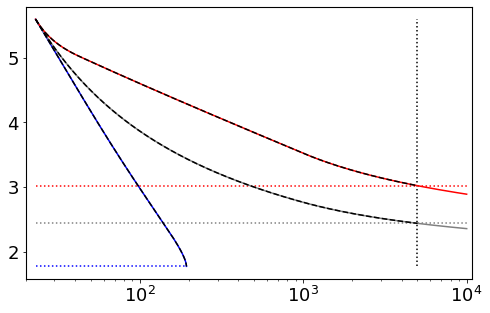

In [24]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(t1_c_10_2, R1_c_10_2, c="blue")
ax.plot(t2_c_10_2, R2_c_10_2, c="grey")
ax.plot(t3_c_10_2, R3_c_10_2, c="red")

ax.plot(t1_c_10, R1_c_10, c="k", ls="--")
ax.plot(t2_c_10, R2_c_10, c="k", ls="--")
ax.plot(t3_c_10, R3_c_10, c="k", ls="--")

ax.vlines(5000, np.min(R1_c_10), np.max(R1_c_10), ls=":", color="k")
ax.hlines(np.min(R1_c_10), np.min(t1_c_10_2), np.max(t1_c_10_2), ls=":", color="blue")
ax.hlines(np.min(R2_c_10), np.min(t2_c_10_2), np.max(t2_c_10_2), ls=":", color="grey")
ax.hlines(np.min(R3_c_10), np.min(t3_c_10_2), np.max(t3_c_10_2), ls=":", color="red")

ax.set_xticks([20,100,300,1000])
ax.set_xlim(20,10800)
ax.set_xscale("log")
plt.show()

In [39]:
R1_d_10[-1], R2_d_10[-1], R3_d_10[-1]

(1.907746135292936, 3.285915447567908, 3.772635444773706)

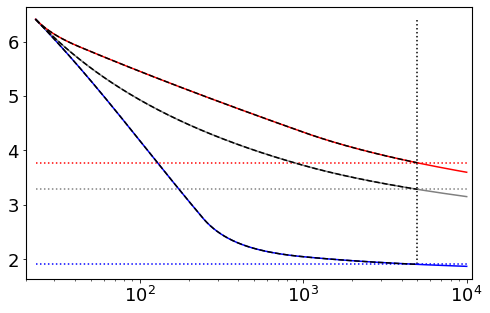

In [19]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(t1_d_10_2, R1_d_10_2, c="blue")
ax.plot(t2_d_10_2, R2_d_10_2, c="grey")
ax.plot(t3_d_10_2, R3_d_10_2, c="red")

ax.plot(t1_d_10, R1_d_10, c="k", ls="--")
ax.plot(t2_d_10, R2_d_10, c="k", ls="--")
ax.plot(t3_d_10, R3_d_10, c="k", ls="--")

ax.vlines(5000, np.min(R1_d_10), np.max(R1_d_10), ls=":", color="k")
ax.hlines(np.min(R1_d_10), np.min(t1_d_10_2), np.max(t1_d_10_2), ls=":", color="blue")
ax.hlines(np.min(R2_d_10), np.min(t2_d_10_2), np.max(t2_d_10_2), ls=":", color="grey")
ax.hlines(np.min(R3_d_10), np.min(t3_d_10_2), np.max(t3_d_10_2), ls=":", color="red")

ax.set_xticks([20,100,300,1000])
ax.set_xlim(20,10800)
ax.set_xscale("log")
plt.show()

# Plot planet population

In [26]:
# Instantiate exoplanetEU2 object (download all the planets)
v = pyasl.ExoplanetEU2()
# Export all data as a pandas DataFrame
planets = v.getAllDataPandas()
planets_masses = planets[~np.isnan(planets["mass"])]

mask_nan = ~(np.isnan(planets["orbital_period"]) | np.isnan(planets["radius"]))
mask_P = planets["orbital_period"]<300
planets_ = planets[mask_nan & mask_P] # dataframe only with planets which have P & R

R_to_earth = 11.2
period = planets_["orbital_period"].values
radius = planets_["radius"].values*R_to_earth
ds = planets_["semi_major_axis"].values

# actual data -> transform to log space
log3P = np.log(period)/np.log(3)
log2R = np.log(radius)/np.log(2)

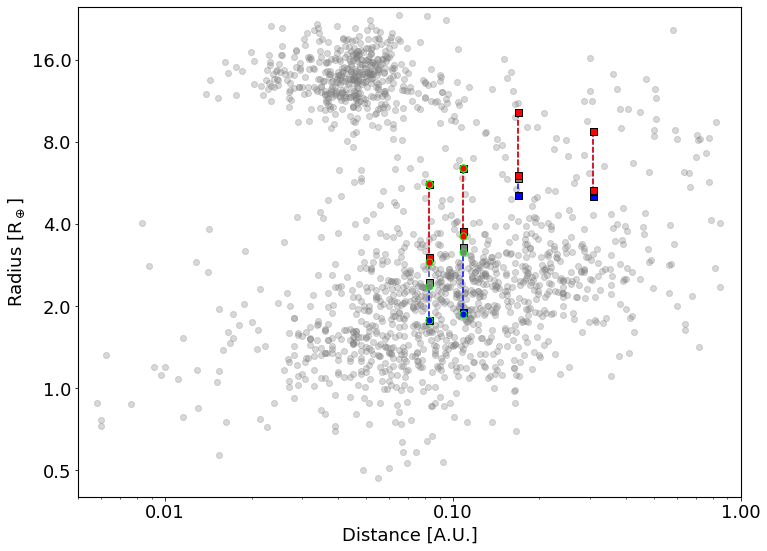

In [48]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(ds, 2**log2R, marker="o", color="grey", alpha=0.3, ls="None")

#ax.plot(planet_case1.distance, planet_case1.radius, marker="s", mec="k", color="aquamarine")
#ax.plot(planet_case1.distance, R1[-1], marker="s", mec="k", color="blue")
#ax.plot(planet_case1.distance, R2[-1], marker="s", mec="k", color="green")
#ax.plot(planet_case1.distance, R3[-1], marker="s", mec="k", color="darkred")

ax.plot([pl_c_10.distance, pl_c_10.distance], [R1_c_10[0], R1_c_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R2_c_10[0], R2_c_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R3_c_10[0], R3_c_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.plot([pl_c_10.distance, pl_c_10.distance], [R1_c_10_2[0], R1_c_10_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R2_c_10_2[0], R2_c_10_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
ax.plot([pl_c_10.distance, pl_c_10.distance], [R3_c_10_2[0], R3_c_10_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_d_10.distance, pl_d_10.distance], [R1_d_10[0], R1_d_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R2_d_10[0], R2_d_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R3_d_10[0], R3_d_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.plot([pl_d_10.distance, pl_d_10.distance], [R1_d_10_2[0], R1_d_10_2[-1]], marker="o", ms=7, mec="lime", color="blue", ls="None")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R2_d_10_2[0], R2_d_10_2[-1]], marker="o", ms=7, mec="lime", color="grey", ls="None")
ax.plot([pl_d_10.distance, pl_d_10.distance], [R3_d_10_2[0], R3_d_10_2[-1]], marker="o", ms=7, mec="lime", color="red", ls="None")

ax.plot([pl_b_10.distance, pl_b_10.distance], [R1_b_10[0], R1_b_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_b_10.distance, pl_b_10.distance], [R2_b_10[0], R2_b_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_b_10.distance, pl_b_10.distance], [R3_b_10[0], R3_b_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.plot([pl_e_10.distance, pl_e_10.distance], [R1_e_10[0], R1_e_10[-1]], marker="s", ms=7, mec="k", color="blue", ls="--")
ax.plot([pl_e_10.distance, pl_e_10.distance], [R2_e_10[0], R2_e_10[-1]], marker="s", ms=7, mec="k", color="grey", ls="--")
ax.plot([pl_e_10.distance, pl_e_10.distance], [R3_e_10[0], R3_e_10[-1]], marker="s", ms=7, mec="k", color="red", ls="--")

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_ylabel("Radius [R$_\oplus$]")
ax.set_xlabel("Distance [A.U.]")
ax.loglog(basey=2, basex=10)
ax.set_ylim(0.4, 25)
ax.set_xlim(0.005, 1.0)

import matplotlib.ticker
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.tight_layout()
plt.show()